In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# from knn import KNN

# KNN (K Nearest Neigber)

- Apple : 0
- Banana : 1
- watermelon : 2

<img src="https://fruityland.co/wp-content/uploads/2021/01/Granny-smith-green-apple-FL.jpg" width="200px" height="180px">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Banana-Single.jpg/220px-Banana-Single.jpg" width="200px" height="180px">

<img src="https://starfishmarket.com/wp-content/uploads/2015/11/watermelon-580x437.jpg" width="200px" height="180px">


In [2]:
def generate_dataset(n):
  apple_width = np.random.normal(6, 1, n)
  apple_lenght = np.random.normal(7, 1, n)
  banana_width = np.random.normal(4, 1, n)
  banana_lenght = np.random.normal(8, 1, n)
  watermelon_width = np.random.normal(8, 1, n)
  watermelon_lenght = np.random.normal(13, 1, n)

  width = np.concatenate((apple_width, banana_width, watermelon_width))
  lenght = np.concatenate((apple_lenght, banana_lenght, watermelon_lenght))
  X = np.array([width, lenght]).T

  Y_apple =  np.zeros(n, dtype='int')
  Y_banana = np.ones(n, dtype='int')
  Y_watermelon = np.ones(n, dtype='int') * 2
  Y = np.concatenate((Y_apple, Y_banana, Y_watermelon))

  return X, Y

In [3]:
X_train, Y_train = generate_dataset(200)

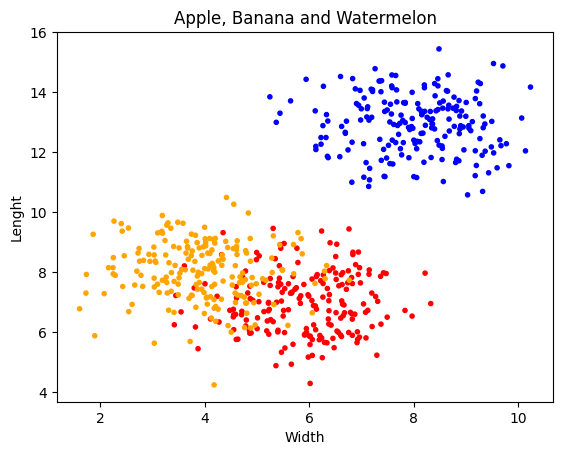

In [4]:
cmap = ['red', 'orange', 'blue']
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=ListedColormap(cmap), marker='.')
plt.title('Apple, Banana and Watermelon')
plt.xlabel('Width')
plt.ylabel('Lenght')
plt.show()

In [5]:
class KNN:
  def __init__(self, k):
    self.k = k

  # Training
  def fit(self, X, Y):
    self.X_train = X
    self.Y_train = Y

  def euqlidian_distance(self, x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

  def predict(self, inputs):
    outputs = []
    for item in inputs:
      distances = []
      for x_train in self.X_train:
        d = self.euqlidian_distance(item, x_train)
        distances.append(d)

      nearest_neighbors = np.argsort(distances)[0:self.k]
      result = np.bincount(self.Y_train[nearest_neighbors])
      outputs.append(np.argmax(result))

    return outputs

  def evaluate(self, X, Y):
    Y_pred = self.predict(X)
    accuracy = np.sum(Y_pred == Y) / len(Y)

    return round(accuracy, 2)

In [6]:
knn = KNN(5)
knn.fit(X_train, Y_train)

In [7]:
item1 = np.array([9, 15])
item2 = np.array([5, 8])
item3 = np.array([5, 12])
item4 = np.array([3, 4])
inputs = [item1, item2, item3, item4]
outputs = knn.predict(inputs)

In [8]:
for result in outputs:
  if result == 0:
    print('Apple🍎')
  elif result == 1:
    print('Banana🍌')
  elif result == 2:
    print('Watermelon🍉')

Watermelon🍉
Banana🍌
Watermelon🍉
Banana🍌


In [9]:
X_test, Y_test = generate_dataset(90)

In [10]:
knn.evaluate(X_test, Y_test)


0.88

In [11]:
Y_pred = knn.predict(X_test)

In [12]:
confusion_matrix = np.zeros((3, 3))

for i in range(270):
  if Y_test[i] == 0 and Y_pred[i] == 0:
    confusion_matrix[0][0] += 1
  elif Y_test[i] == 0 and Y_pred[i] == 1:
    confusion_matrix[0][1] += 1
  elif Y_test[i] == 0 and Y_pred[i] == 2:
    confusion_matrix[0][2] += 1
  elif Y_test[i] == 1 and Y_pred[i] == 0:
    confusion_matrix[1][0] += 1
  elif Y_test[i] == 1 and Y_pred[i] == 1:
    confusion_matrix[1][1] += 1
  elif Y_test[i] == 1 and Y_pred[i] == 2:
    confusion_matrix[1][2] += 1
  elif Y_test[i] == 2 and Y_pred[i] == 0:
    confusion_matrix[2][0] += 1
  elif Y_test[i] == 2 and Y_pred[i] == 1:
    confusion_matrix[2][1] += 1
  elif Y_test[i] == 2 and Y_pred[i] == 2:
    confusion_matrix[2][2] += 1

confusion_matrix

array([[74., 16.,  0.],
       [17., 73.,  0.],
       [ 0.,  0., 90.]])

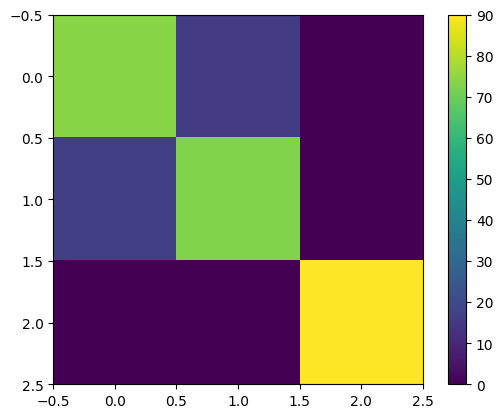

In [13]:
plt.imshow(confusion_matrix)
plt.colorbar()
plt.show()

# KNN with scikit-learn

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

knn.predict(inputs)

array([2, 1, 2, 1])

In [16]:
knn.score(X_test, Y_test)

0.8777777777777778